In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:47<00:00, 25.5MB/s]
100% 1.06G/1.06G [00:47<00:00, 23.9MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras import layers

In [5]:
# using generators for processing large amount of data
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)


validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
# Normalize
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

In [7]:
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [8]:
# developing concolutional neural network
model=Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides=2,padding='valid'),

    layers.Conv2D(filters=64,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides=2,padding='valid'),

    layers.Conv2D(filters=128,kernel_size=(3,3),padding='valid',activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2),strides=2,padding='valid'),

    layers.Flatten(),

    layers.Dense(128,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(64,activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(1,activation='sigmoid')

])

In [9]:
model.summary(
    
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 82s 115ms/step - loss: 1.6526 - accuracy: 0.5889 - val_loss: 0.5956 - val_accuracy: 0.6754
Epoch 2/10
625/625 [==============================] - 72s 115ms/step - loss: 0.5887 - accuracy: 0.6944 - val_loss: 0.5800 - val_accuracy: 0.6996
Epoch 3/10
625/625 [==============================] - 73s 116ms/step - loss: 0.5187 - accuracy: 0.7491 - val_loss: 0.5099 - val_accuracy: 0.7504
Epoch 4/10
625/625 [==============================] - 72s 115ms/step - loss: 0.4349 - accuracy: 0.8005 - val_loss: 0.4439 - val_accuracy: 0.7962
Epoch 5/10
625/625 [==============================] - 72s 115ms/step - loss: 0.3837 - accuracy: 0.8290 - val_loss: 0.4321 - val_accuracy: 0.8050
Epoch 6/10
625/625 [==============================] - 73s 117ms/step - loss: 0.3252 - accuracy: 0.8587 - val_loss: 0.9556 - val_accuracy: 0.6466
Epoch 7/10
625/625 [==============================] - 72s 115ms/step - loss: 0.2464 - accuracy: 0.8965 - val_loss: 1.2201 - val_ac

[]

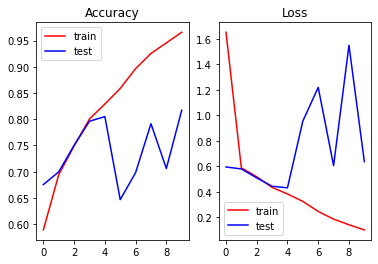

In [12]:
import matplotlib.pyplot as plt



plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='test')
plt.title("Accuracy")
plt.legend()
plt.plot()




plt.subplot(1,2,2)
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='test')
plt.title("Loss")
plt.legend()
plt.plot()

In [13]:
import cv2

In [14]:
def model_prediction(path):
  img=cv2.imread(path)
  img=cv2.resize(img,(256,256))
  img=img.reshape((1,256,256,3))
  result=model.predict(img)
  return result


In [19]:
a=model_prediction("/content/download.jpg")

1/1 [==============================] - 0s 17ms/step


In [20]:
a

array([[0.]], dtype=float32)

In [22]:
import pickle

In [23]:
pickle.dump(model,open("cat-vs-dog-model.pkl",'wb'))